**R入門（その2）**

---



**このノートブックについて**<br>
このColabのノートブック「R入門（その2）」では「Rで相関係数の計算や単回帰をする方法」を解説します（重回帰は別に説明します）。
<br>すでに「[R入門（その1）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_1_basic.ipynb)」を読んでいることを前提に説明します。未読の人は「R入門（その1）」を先に読んでください。
<br>
> 注：このノートブックは駒澤大学経済学部で開講している「経済統計a/b」で「Excel以外の手法を学ぶ意欲がある履修生向け」に**最低限の知識**だけ解説する**補助資料**です
<br>
> 補足：（英語ですが）Rを使った計量経済分析は以下のサイト"Introduction to Econometrics with R"が非常にまとまっていますので、意欲がある人はチャレンジしてみてください。<br>https://www.econometrics-with-r.org/

**最初に呪文（全オブジェクトの削除）**<br>最初にちょっとした呪文を入れましょう。<br>（補足：以下の呪文rm(list=ls())は既にあるオブジェクトを全部削除するコマンドです。必須ではありませんが、場合によってはトラブルを避けるために役立つことがあります。）


In [1]:
rm(list=ls())

データ分析（回帰分析）を使うため、データ（CSVファイル）をインターネットから読み込みます。ここではread.csv()という関数を使ってインターネット上にあるデータをRに読み込み、ice.dataという名前で保存します。head()という関数はデータを上から6行表示する関数です。

> なお、変数名がice.dataとなっていますが、Rは変数名にピリオド.を使うことができます（たとえばPythonの場合はピリオド.は変数名に使えません）


> 補足：Rでは外部からデータを読み込む方法は色々あります。個人的なお勧めは小規模なデータ管理ではExcelを使い、openxlsxというパッケージを使ってxlsxファイルを直接読み込むやり方です。ただし、データ管理のやり方は個人的な趣味もあるので、「この方法が一番いい」というのは難しいですね。<br>参考：https://www.pu-hiroshima.ac.jp/p/ttetsuji/R/[72]openxlsx.html


> 下記のデータは総務省の家計調査と気象庁の東京都の平均気温（月次）から




In [2]:
 #古い ice.data <- read.csv("https://www.dropbox.com/s/2ky13qi387j8b05/kion_iceCream.csv?raw=1",header=T)
 ice.data <- read.csv("https://raw.githubusercontent.com/koiti-yano/colab/main/data/kion_iceCream.csv",header=T)
 head(ice.data)

,年月,気温,アイスクリーム支出金額
,<chr>,<dbl>,<int>
1,2005年4月,15.1,541
2,2005年5月,17.7,666
3,2005年6月,23.2,801
4,2005年7月,25.6,1033
5,2005年8月,28.1,1175
6,2005年9月,24.7,737


次にデータフレームを学びましょう。といっても実はすでに登場しています。上でread.csv()で読み込んで作ったice.dataという変数がデータフレームといいます。
<br>
どういうものかというと、head()を使ってice.dataの上6行を表示しましたが、1列目の「年月」には文字列（年と月）、2列目の「気温」には小数（気温℃）、3列目には「アイスクリーム支出金額」には金額（円）が入っています（言い換えると1列目には文字列、2列・3列目には数字が入っています）。
<br><br>**ポイント：データフレームは便利**<br>データフレームには文字列や数字などいろいろなデータが入れられるというのが特徴で、とても便利なものです。
> 補足：Rに詳しい人は「え？配列や行列の説明はしないのか？」と思うかもしれません。私も迷うところですが、このノートブックでは飛ばします。



**相関係数の計算と散布図のプロット**
<br>
ice.dataというデータフレームを作ったので、そのデータを使って相関係数を計算してみましょう。ice.data中の「気温」と「アイスクリーム支出金額」の相関係数を計算してみましょう。ice.dataから一部のデータ（列）を取り出すにはドルマーク\$を使います。たとえば、ice.data\$気温と書けば、「気温」のデータだけを取り出すことができます。
<br>
相関係数はcor()という関数を使います。実際の使い方は以下の例を見てください。

> なお、「cor(ice.data[,"気温"],ice.data[,"アイスクリーム支出金額"])」することもできますが、$を使うの方が簡単かなと（個人的には）思います。



[1] 0.8985968

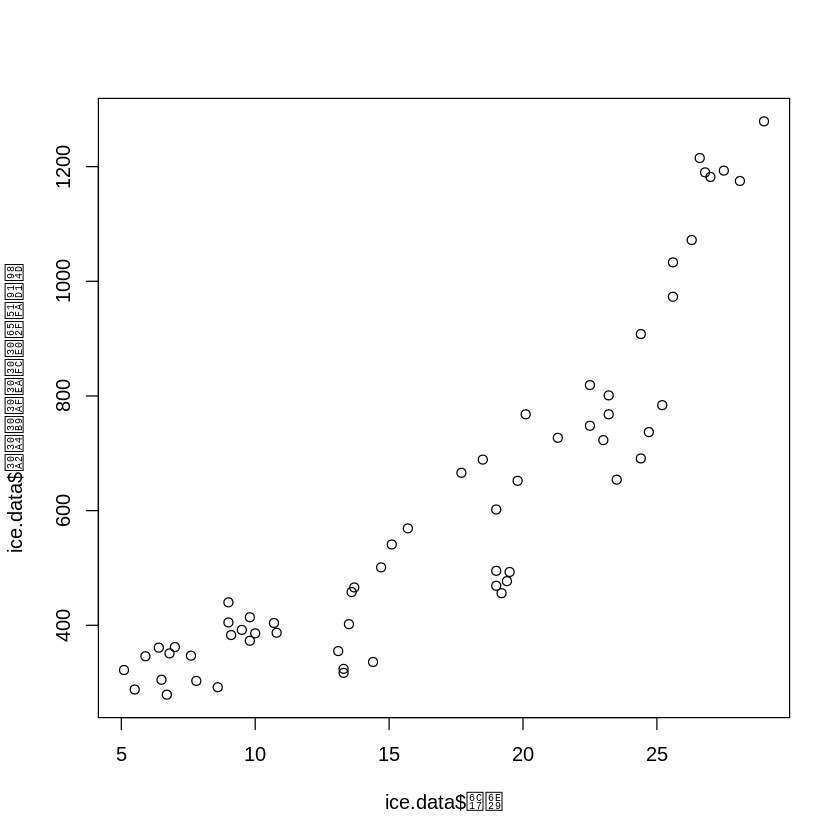

In [3]:
cor(ice.data$気温,ice.data$アイスクリーム支出金額)
plot(ice.data$気温,ice.data$アイスクリーム支出金額)

補足：plot()という関数はグラフをプロット（作成）するコマンドです。plot()は別途説明します。

**単回帰をやってみよう**<br>
最後にice.dataを使って回帰分析をやってみましょう。lm()を使います。

**lm()の使い方**<br>
lm()の使い方は少し解説が必要ですね。一見すると難しそうに感じるかもしれませんが、下の図を見ながら説明を読んでください。
<br>必要なのは(1) 回帰式を指定するところ、(2) 使用するデータフレーム名を指定するところの2箇所だけです（実際には他にもいろいろな機能があるのですが、初心者の皆さんはとりあえずこの2箇所だけ覚えてください）。


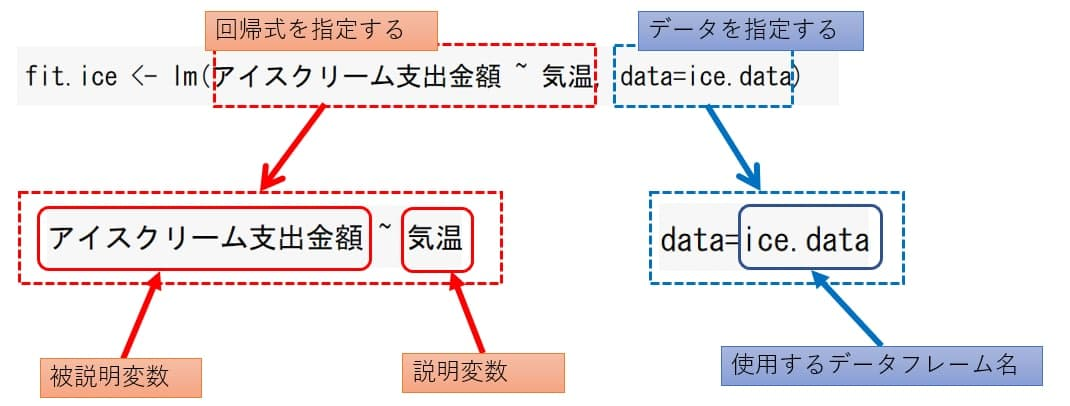
なお、関数lm()の結果も変数に入力することができますので、変数名をfit.iceとしてみましょう。

In [4]:
fit.ice <- lm(アイスクリーム支出金額 ~ 気温, data=ice.data)


何も出力されませんね。（すでに気がついた人がいるかもしれませんが）ここまでずっとそうだったのです。実は変数は入力されたあと、基本的には何も出力しません（出力とはなにかの結果を画面に表示することです）。
<br>fit.iceの内容をきちんと表示しようと思ったらsummary()という関数を使うのがお勧めです。

In [5]:
summary(fit.ice)


Call:
lm(formula = アイスクリーム支出金額 ~ 気温, data = ice.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-234.06  -82.82   12.71   74.13  265.39 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.640     40.652   0.409    0.684    
気温          35.074      2.249  15.597   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 126.3 on 58 degrees of freedom
Multiple R-squared:  0.8075,	Adjusted R-squared:  0.8042 
F-statistic: 243.3 on 1 and 58 DF,  p-value: < 2.2e-16


summary(fit.ice)の詳しい読み方は授業資料で解説しますが、大雑把に図示すると以下のようになります。


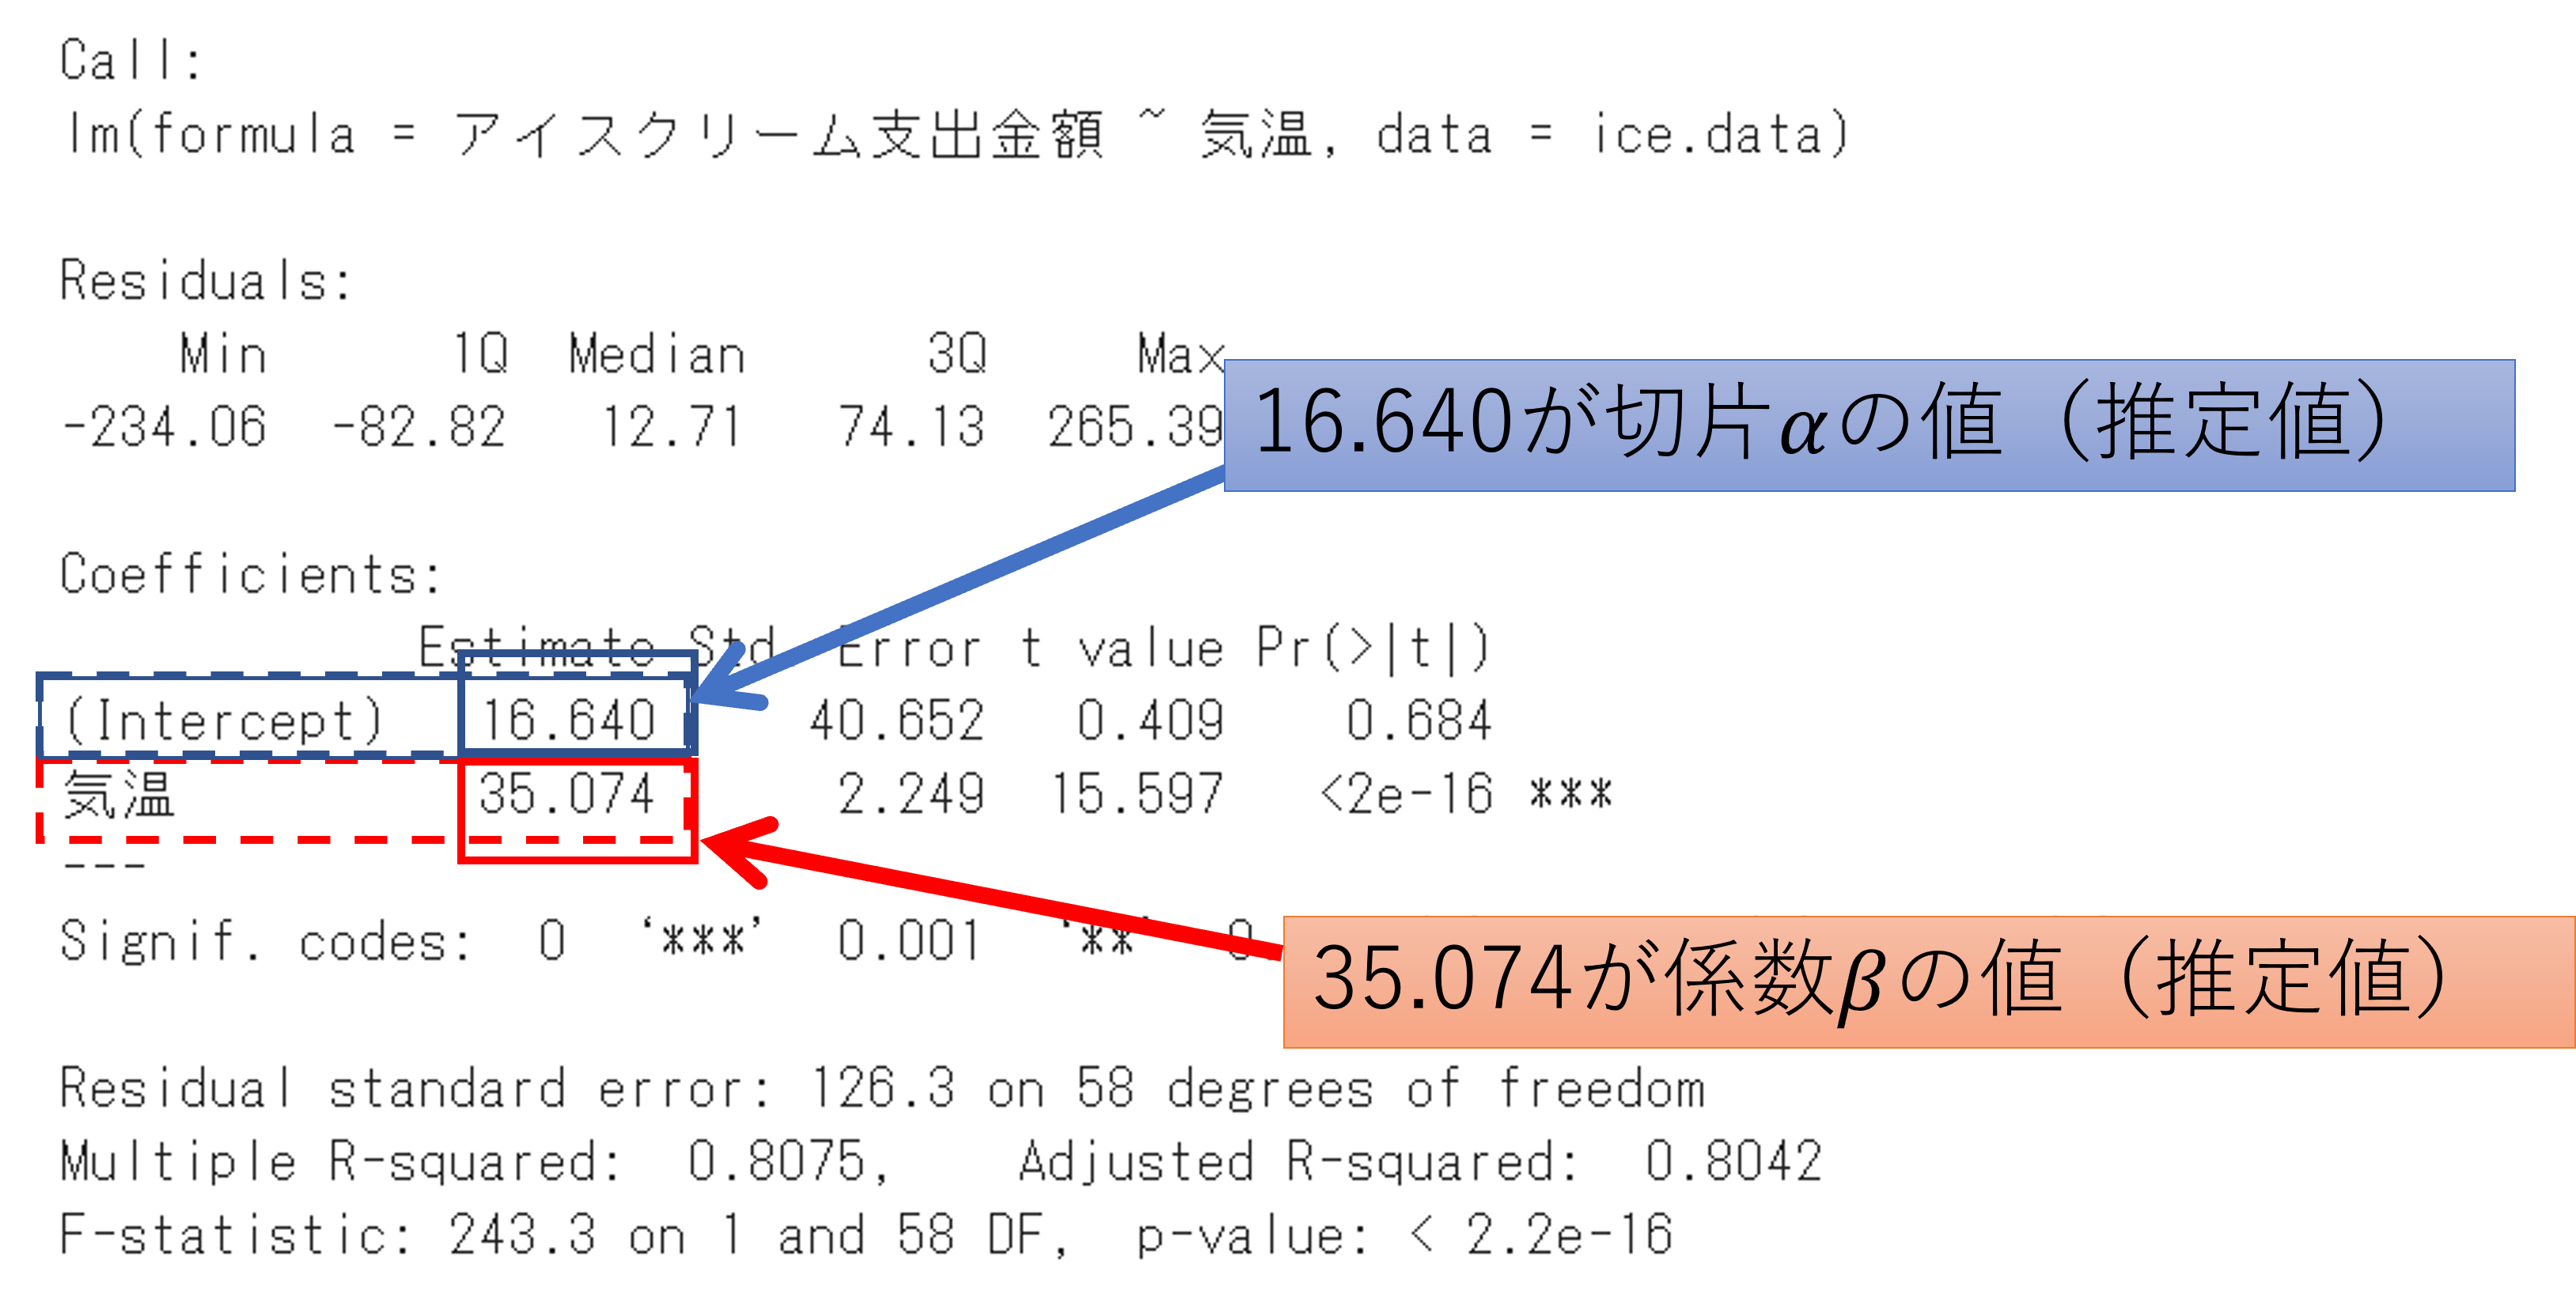

summary(fit.ice)の結果を使うと単回帰は以下のように書くことができます。

$ y= 35.074 x + 16.640 + e$

これで回帰分析（lm()）の大雑把な解説は終わりです。
<br><br>
